# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from weather_api import weather_api as api
import matplotlib.pyplot as plt
from citipy import citipy
import scipy.stats as sp
import pandas as pd
import numpy as np
import requests
import gmaps
import os

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL API Call
url = "http://api.openweathermap.org/data/2.5/weather?q="
extension = "&units=imperial&appid="

In [5]:
#location_id = []
location_name = []
location_country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
wind_speed = []
cloudiness = []

city_counter=0
tot_cities=len(cities)

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    success=True
    data_json = requests.get(url+city+extension+api)
    data_json = data_json.json()
    
    # Syntax Inspired By Lecture 6-2
    try:
        #location_id.append(weather_data['sys']['id'] )
        location_name.append(data_json['name'])
        location_country.append(data_json['sys']['country'])
        date.append(data_json['dt'])
        latitude.append(data_json['coord']['lat'])
        longitude.append(data_json['coord']['lon'])
        max_temperature.append(data_json['main']['temp_max'])
        humidity.append(data_json['main']['humidity'])
        wind_speed.append(data_json['wind']['speed'])
        cloudiness.append(data_json['clouds']['all'])
        success=True
        
    except:
        tot_cities -= 1
        city_counter = city_counter
        print(f"City not found. Skipping...")
        success=False
        
    if success:
        print(f"Processing Record {city_counter} of {tot_cities} | {city}")
        city_counter += 1

Beginning Data Retrieval
-----------------------------
Processing Record 0 of 599 | nikolskoye
Processing Record 1 of 599 | arraial do cabo
Processing Record 2 of 599 | jamestown
Processing Record 3 of 599 | nalut
Processing Record 4 of 599 | busselton
Processing Record 5 of 599 | ternate
Processing Record 6 of 599 | hermanus
Processing Record 7 of 599 | kaputa
Processing Record 8 of 599 | deputatskiy
Processing Record 9 of 599 | becerril
Processing Record 10 of 599 | rikitea
Processing Record 11 of 599 | japura
Processing Record 12 of 599 | vilcun
Processing Record 13 of 599 | bonthe
Processing Record 14 of 599 | mahebourg
Processing Record 15 of 599 | mehamn
Processing Record 16 of 599 | saint-philippe
Processing Record 17 of 599 | georgetown
Processing Record 18 of 599 | esso
Processing Record 19 of 599 | takoradi
Processing Record 20 of 599 | lamu
Processing Record 21 of 599 | port hedland
City not found. Skipping...
Processing Record 22 of 598 | camacha
Processing Record 23 of 598

Processing Record 196 of 585 | cabedelo
Processing Record 197 of 585 | antofagasta
Processing Record 198 of 585 | qaanaaq
City not found. Skipping...
Processing Record 199 of 584 | vaini
Processing Record 200 of 584 | borogontsy
Processing Record 201 of 584 | lorengau
Processing Record 202 of 584 | ponta do sol
Processing Record 203 of 584 | tawau
Processing Record 204 of 584 | mount gambier
Processing Record 205 of 584 | gorodets
Processing Record 206 of 584 | torbay
City not found. Skipping...
Processing Record 207 of 583 | cayenne
Processing Record 208 of 583 | kiunga
Processing Record 209 of 583 | mae chan
Processing Record 210 of 583 | fairbanks
Processing Record 211 of 583 | sawakin
Processing Record 212 of 583 | ariquemes
Processing Record 213 of 583 | aykhal
Processing Record 214 of 583 | douglas
City not found. Skipping...
Processing Record 215 of 582 | casper
Processing Record 216 of 582 | abdulino
Processing Record 217 of 582 | richards bay
Processing Record 218 of 582 | ves

Processing Record 392 of 571 | college
Processing Record 393 of 571 | bilibino
Processing Record 394 of 571 | coolum beach
Processing Record 395 of 571 | constantine
Processing Record 396 of 571 | bereda
Processing Record 397 of 571 | fortuna
Processing Record 398 of 571 | bogo
Processing Record 399 of 571 | laguna
Processing Record 400 of 571 | sioux lookout
Processing Record 401 of 571 | hirara
Processing Record 402 of 571 | linshui
Processing Record 403 of 571 | hendaye
Processing Record 404 of 571 | dawei
City not found. Skipping...
Processing Record 405 of 570 | castro
Processing Record 406 of 570 | alpena
Processing Record 407 of 570 | rawah
Processing Record 408 of 570 | kindia
Processing Record 409 of 570 | sao joao da barra
Processing Record 410 of 570 | codrington
Processing Record 411 of 570 | mabaruma
City not found. Skipping...
Processing Record 412 of 569 | birjand
Processing Record 413 of 569 | benguela
Processing Record 414 of 569 | san patricio
Processing Record 415 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df_dimensions = pd.DataFrame({
    #"City ID":len(ids),
    "City":len(location_name),
    "Country":len(location_country),
    "Date":len(date),
    "Latitude":len(latitude),
    "Longitude":len(longitude),
    "Max Temp(f)":len(max_temperature),
    "Humidity":len(humidity),
    "Wind Speed":len(wind_speed),
    "Cloudiness":len(cloudiness),
},index=[0]).transpose()
weather_df_dimensions

,0
City,553
Country,553
Date,553
Latitude,553
Longitude,553
Max Temp(f),553
Humidity,553
Wind Speed,553
Cloudiness,553


In [7]:
weather_df = pd.DataFrame({
    #"Location ID":location_ids,
    "City":location_name,
    "Country":location_country,
    "Date":date,
    "Latitude":latitude,
    "Longitude":longitude,
    "Max Temp(f)":max_temperature,
    "Humidity":humidity,
    "Wind Speed":wind_speed,
    "Cloudiness":cloudiness,
})
weather_df.to_csv("output_data/cities.csv")
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,Nikolskoye,RU,1586068209,59.70,30.79,37.00,59,17.90,0
1,Arraial do Cabo,BR,1586068184,-22.97,-42.03,74.97,70,9.17,8
2,Jamestown,US,1586068198,42.10,-79.24,46.99,81,6.93,90
3,Nālūt,LY,1586068264,30.33,10.85,49.87,53,9.17,18
4,Busselton,AU,1586068181,-33.65,115.33,72.00,34,3.53,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (f)')

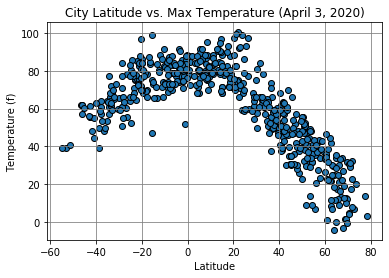

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp(f)"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Max Temperature (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

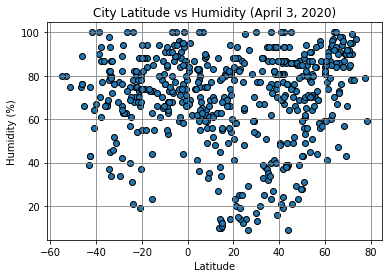

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs Humidity (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

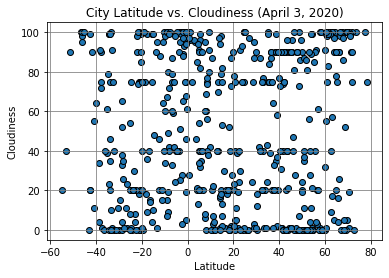

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Cloudiness (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

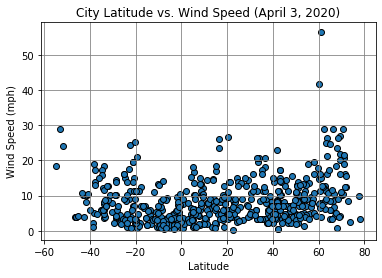

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Wind Speed (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
    line = slope*x+intercept
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x,line,"-", color='r',linewidth=3)
    #plt.annotate(line,(x,y),fontsize=15,color="red")
    
    if slope < 0:
        print(f"R-Squared Value: -{r_value**2}")
    else:
        print(f"R-Squared Value: {r_value**2}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['Latitude']>0]
southern_df = weather_df[weather_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared Value: -0.8138543900407655


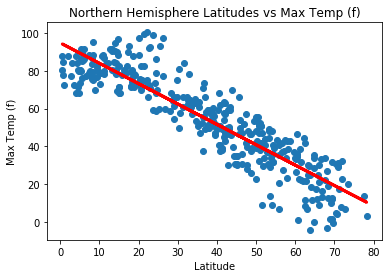

In [14]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
linear_regression(northern_df['Latitude'],northern_df['Max Temp(f)'],"Latitude","Max Temp (f)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared Value: 0.46918371024896227


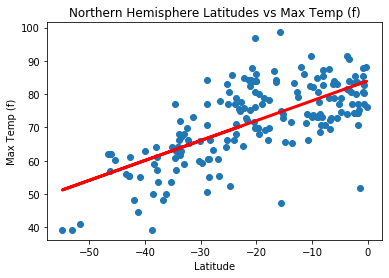

In [15]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
linear_regression(southern_df['Latitude'],southern_df['Max Temp(f)'],"Latitude","Max Temp (f)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared Value: 0.07102329800390919


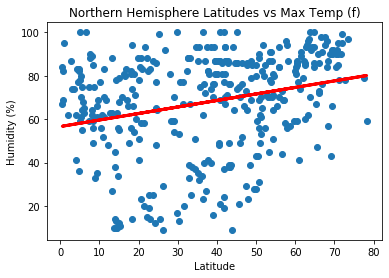

In [16]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linear_regression(northern_df['Latitude'],northern_df['Humidity'],"Latitude","Humidity (%)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared Value: 0.024744260591111126


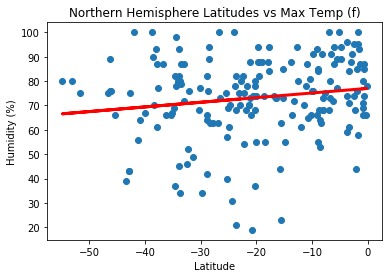

In [17]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linear_regression(southern_df['Latitude'],southern_df['Humidity'],"Latitude","Humidity (%)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value: 0.01135707500002999


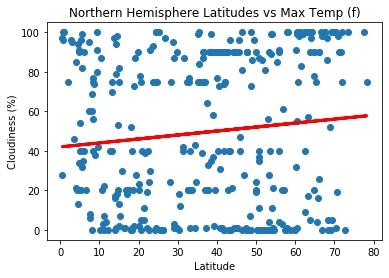

In [18]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linear_regression(northern_df['Latitude'],northern_df['Cloudiness'],"Latitude","Cloudiness (%)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared Value: 0.035132386171923484


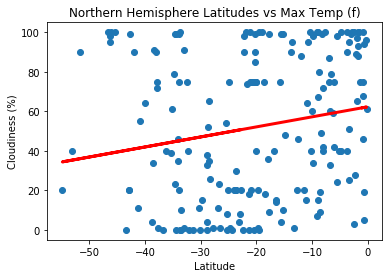

In [19]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linear_regression(southern_df['Latitude'],southern_df['Cloudiness'],"Latitude","Cloudiness (%)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value: 0.0713442460753678


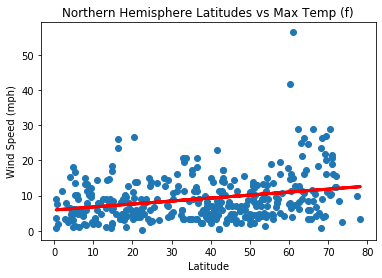

In [20]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linear_regression(northern_df['Latitude'],northern_df['Wind Speed'],"Latitude","Wind Speed (mph)", "Northern Hemisphere Latitudes vs Max Temp (f)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared Value: -0.16252299827168873


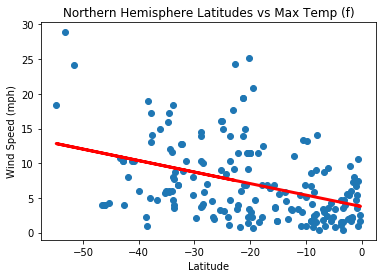

In [21]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linear_regression(southern_df['Latitude'],southern_df['Wind Speed'],"Latitude","Wind Speed (mph)", "Northern Hemisphere Latitudes vs Max Temp (f)")